In [1]:
import pandas as pd
import numpy as np
import plotnine as pn
from scipy import stats

In [2]:
df = pd.read_csv("online_ad_AB.csv")

In [3]:
df

,customerID,test group,made_purchase,days_with_most_add,peak ad hours,ad_count
0,1,ad,False,24,20,5
1,2,psa,False,21,16,9
2,3,psa,False,1,18,8
3,4,ad,False,20,23,7
4,5,ad,False,3,13,5
...,...,...,...,...,...,...
19995,19996,psa,False,17,16,9
19996,19997,ad,False,27,16,8
19997,19998,ad,False,6,18,9
19998,19999,ad,False,24,18,9


In [4]:
df["made_purchase"] = df["made_purchase"].astype(int)

In [5]:
df["made_purchase"].sum() / 20000

np.float64(0.053)

In [6]:
conversion_rates = df.groupby("test group")["made_purchase"].agg(conversion_rate=np.mean, total_purchased=np.sum, total_count=np.size).reset_index()
conversion_rates

/tmp/ipykernel_9158/327147936.py:1: FutureWarning: The provided callable <function mean at 0x7fa7bc0bb880> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
/tmp/ipykernel_9158/327147936.py:1: FutureWarning: The provided callable <function sum at 0x7fa7bc0ba480> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.


,test group,conversion_rate,total_purchased,total_count
0,ad,0.066622,803,12053
1,psa,0.032339,257,7947


In [7]:
ad = df[df["test group"] == "ad"]["made_purchase"]
psa = df[df["test group"] == "psa"]["made_purchase"]

In [8]:
t_stat, p_value = stats.ttest_ind(ad, psa, equal_var=False)
print(t_stat, p_value)

11.36607697199719 7.627343165927167e-30


The t_stat tells you which set has a greater mean the larger the value the further appart they are. The p_value tells you if the data is realiable, if it is below .05 then the difference is unlikely becasue of chance, so it must be below .05 to draw a meaningful conclusion form the t test.

Depending on what you are looking at with the A/B tests you might have to use a different test to determine if the test was succesful and not by chance. 


![Distributions](wiki_tests.png)

Mann-Whitney U Test Example case would be time spent on a website.

scipy.stats.fisher_exact, scipy.stats.chi2_contingency, scipy.stats.mannwhitneyu. 

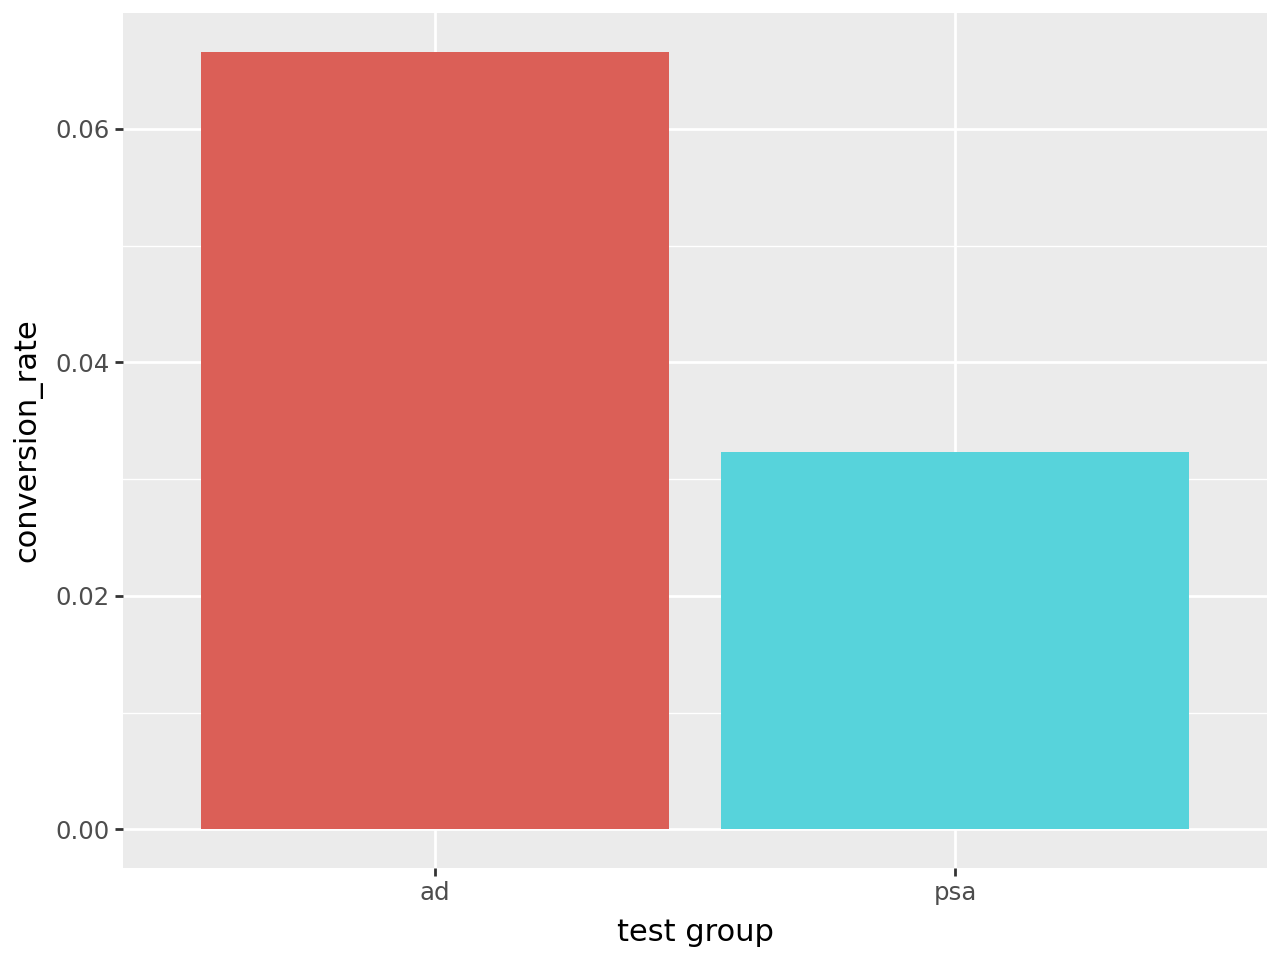

In [9]:
pn.ggplot(conversion_rates, pn.aes("test group", "conversion_rate", fill="test group")) + pn.geom_bar(stat="identity", show_legend=False)

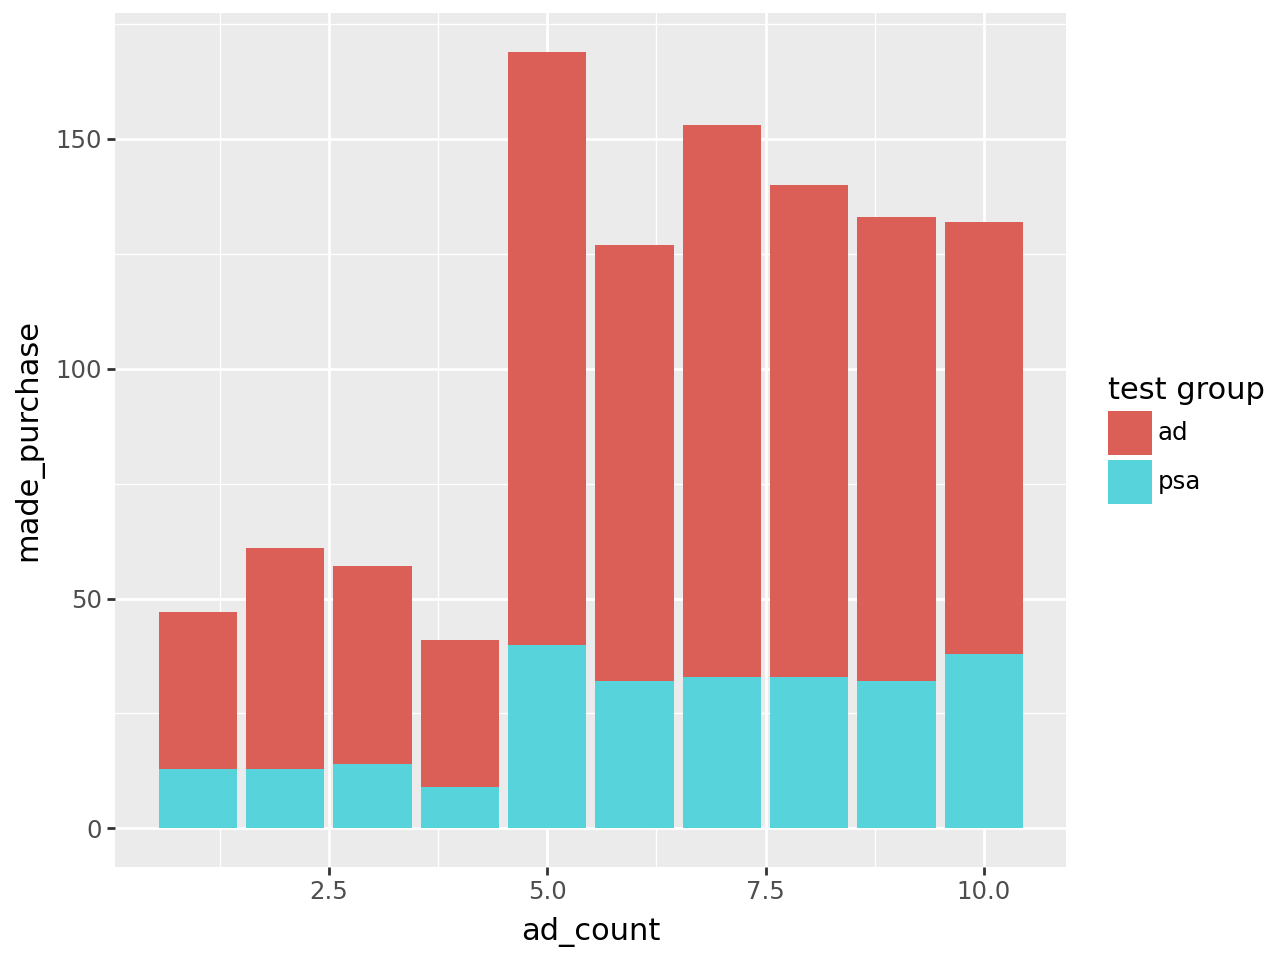

In [10]:
pn.ggplot(df, pn.aes("ad_count", "made_purchase", fill="test group")) + pn.geom_bar(stat="identity", show_legend=True)

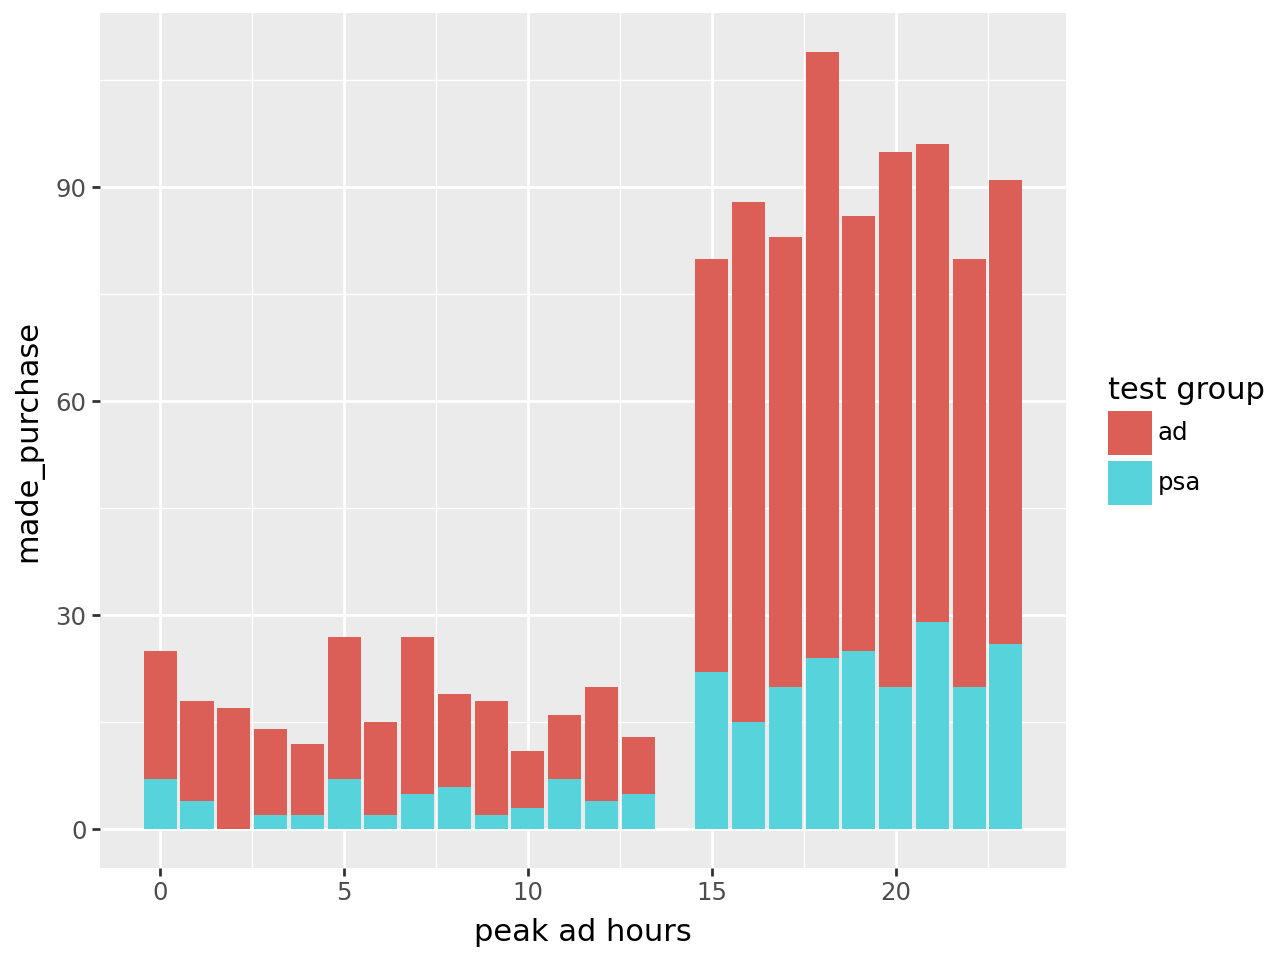

In [11]:
pn.ggplot(df, pn.aes("peak ad hours", "made_purchase", fill="test group")) + pn.geom_bar(stat="identity", show_legend=True)

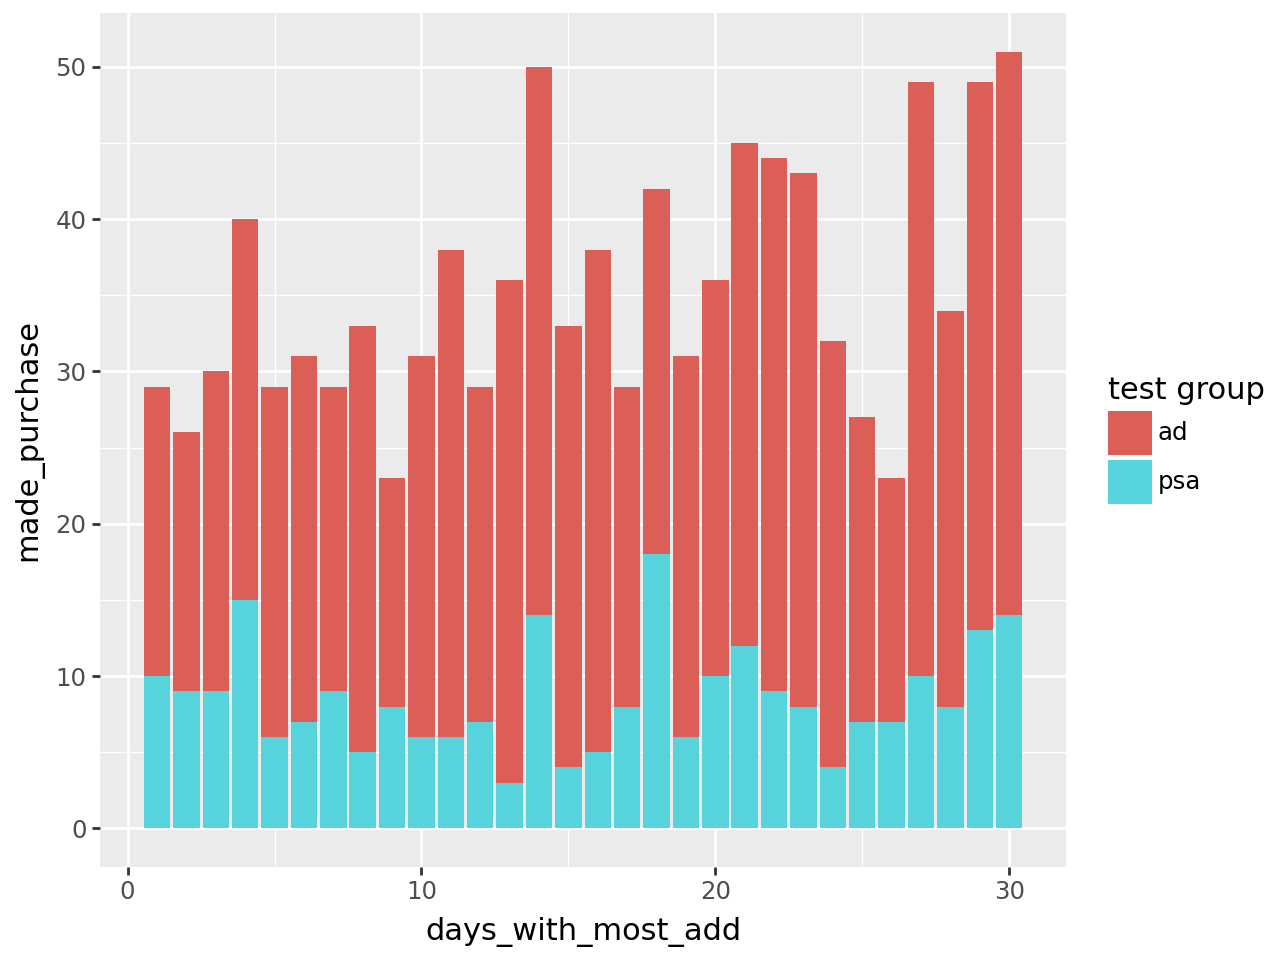

In [12]:
pn.ggplot(df, pn.aes("days_with_most_add", "made_purchase", fill="test group")) + pn.geom_bar(stat="identity", show_legend=True)